# Airline Passenger Satisfaction With Machine Learning

In [2]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings("ignore") 


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier



from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score

# There is the following information about the passengers of some airline:

Gender: male or female

Customer type: regular or non-regular airline customer

Age: the actual age of the passenger

Type of travel: the purpose of the passenger's flight (personal or business travel)

Class: business, economy, economy plus

Flight distance

Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)

Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)

Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)

Gate location: level of satisfaction with the gate location (0: not rated; 1-5)

Food and drink: food and drink satisfaction level (0: not rated; 1-5)

Online boarding: satisfaction level with online boarding (0: not rated; 1-5)

Seat comfort: seat satisfaction level (0: not rated; 1-5)

Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)

On-board service: level of satisfaction with on-board service (0: not rated; 1-5)

Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)

Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)

Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)

Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)

Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)

Departure delay in minutes:

Arrival delay in minutes:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction).

In [3]:
df_train=pd.read_csv("train.csv")

In [4]:
df_test=pd.read_csv("test.csv")

In [5]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df_train.shape

(103904, 25)

In [8]:
df_test.shape

(25976, 25)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [11]:
df_train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
df_test.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [13]:
df_train.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [14]:
df_train.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [15]:
df_train.isnull().sum()/len(df_train)*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [16]:
df_test.isnull().sum()/len(df_test)*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [17]:
df_test.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [19]:
df_train.drop(columns=['Unnamed: 0'],inplace=True)

In [20]:
df_train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [21]:
df1=df_train.append(df_test)

In [22]:
df1

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [23]:
# Filling Null values :

In [24]:
df1['Arrival Delay in Minutes'].mean()

15.09112883918849

In [25]:
df1['Arrival Delay in Minutes']=df1['Arrival Delay in Minutes'].fillna(df1['Arrival Delay in Minutes'].mean())

In [26]:
df1.isnull().sum()/len(df1)*100

id                                   0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [27]:
df1.duplicated().sum()

0

In [28]:
df1.drop(columns=['id'],inplace=True)

# EXploratory Data Analysis 

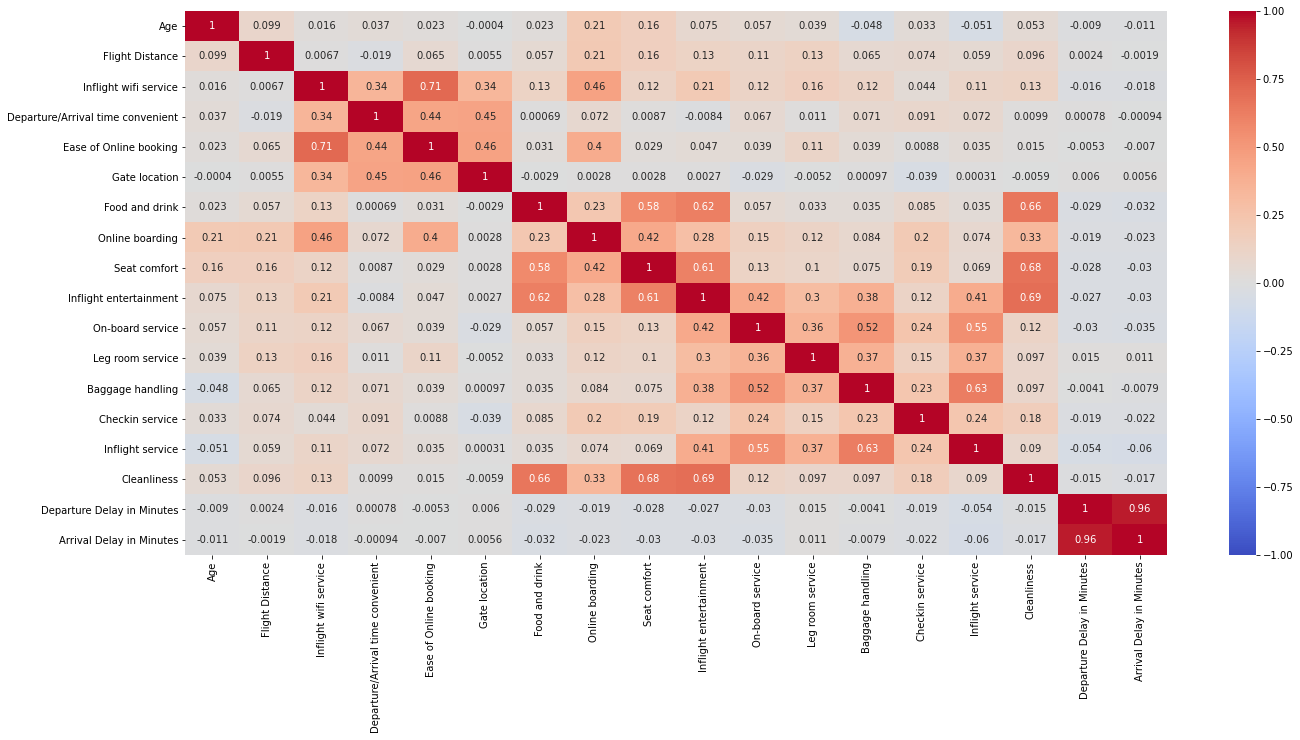

In [29]:
plt.figure(figsize=(22, 10))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

Data distribution graphs

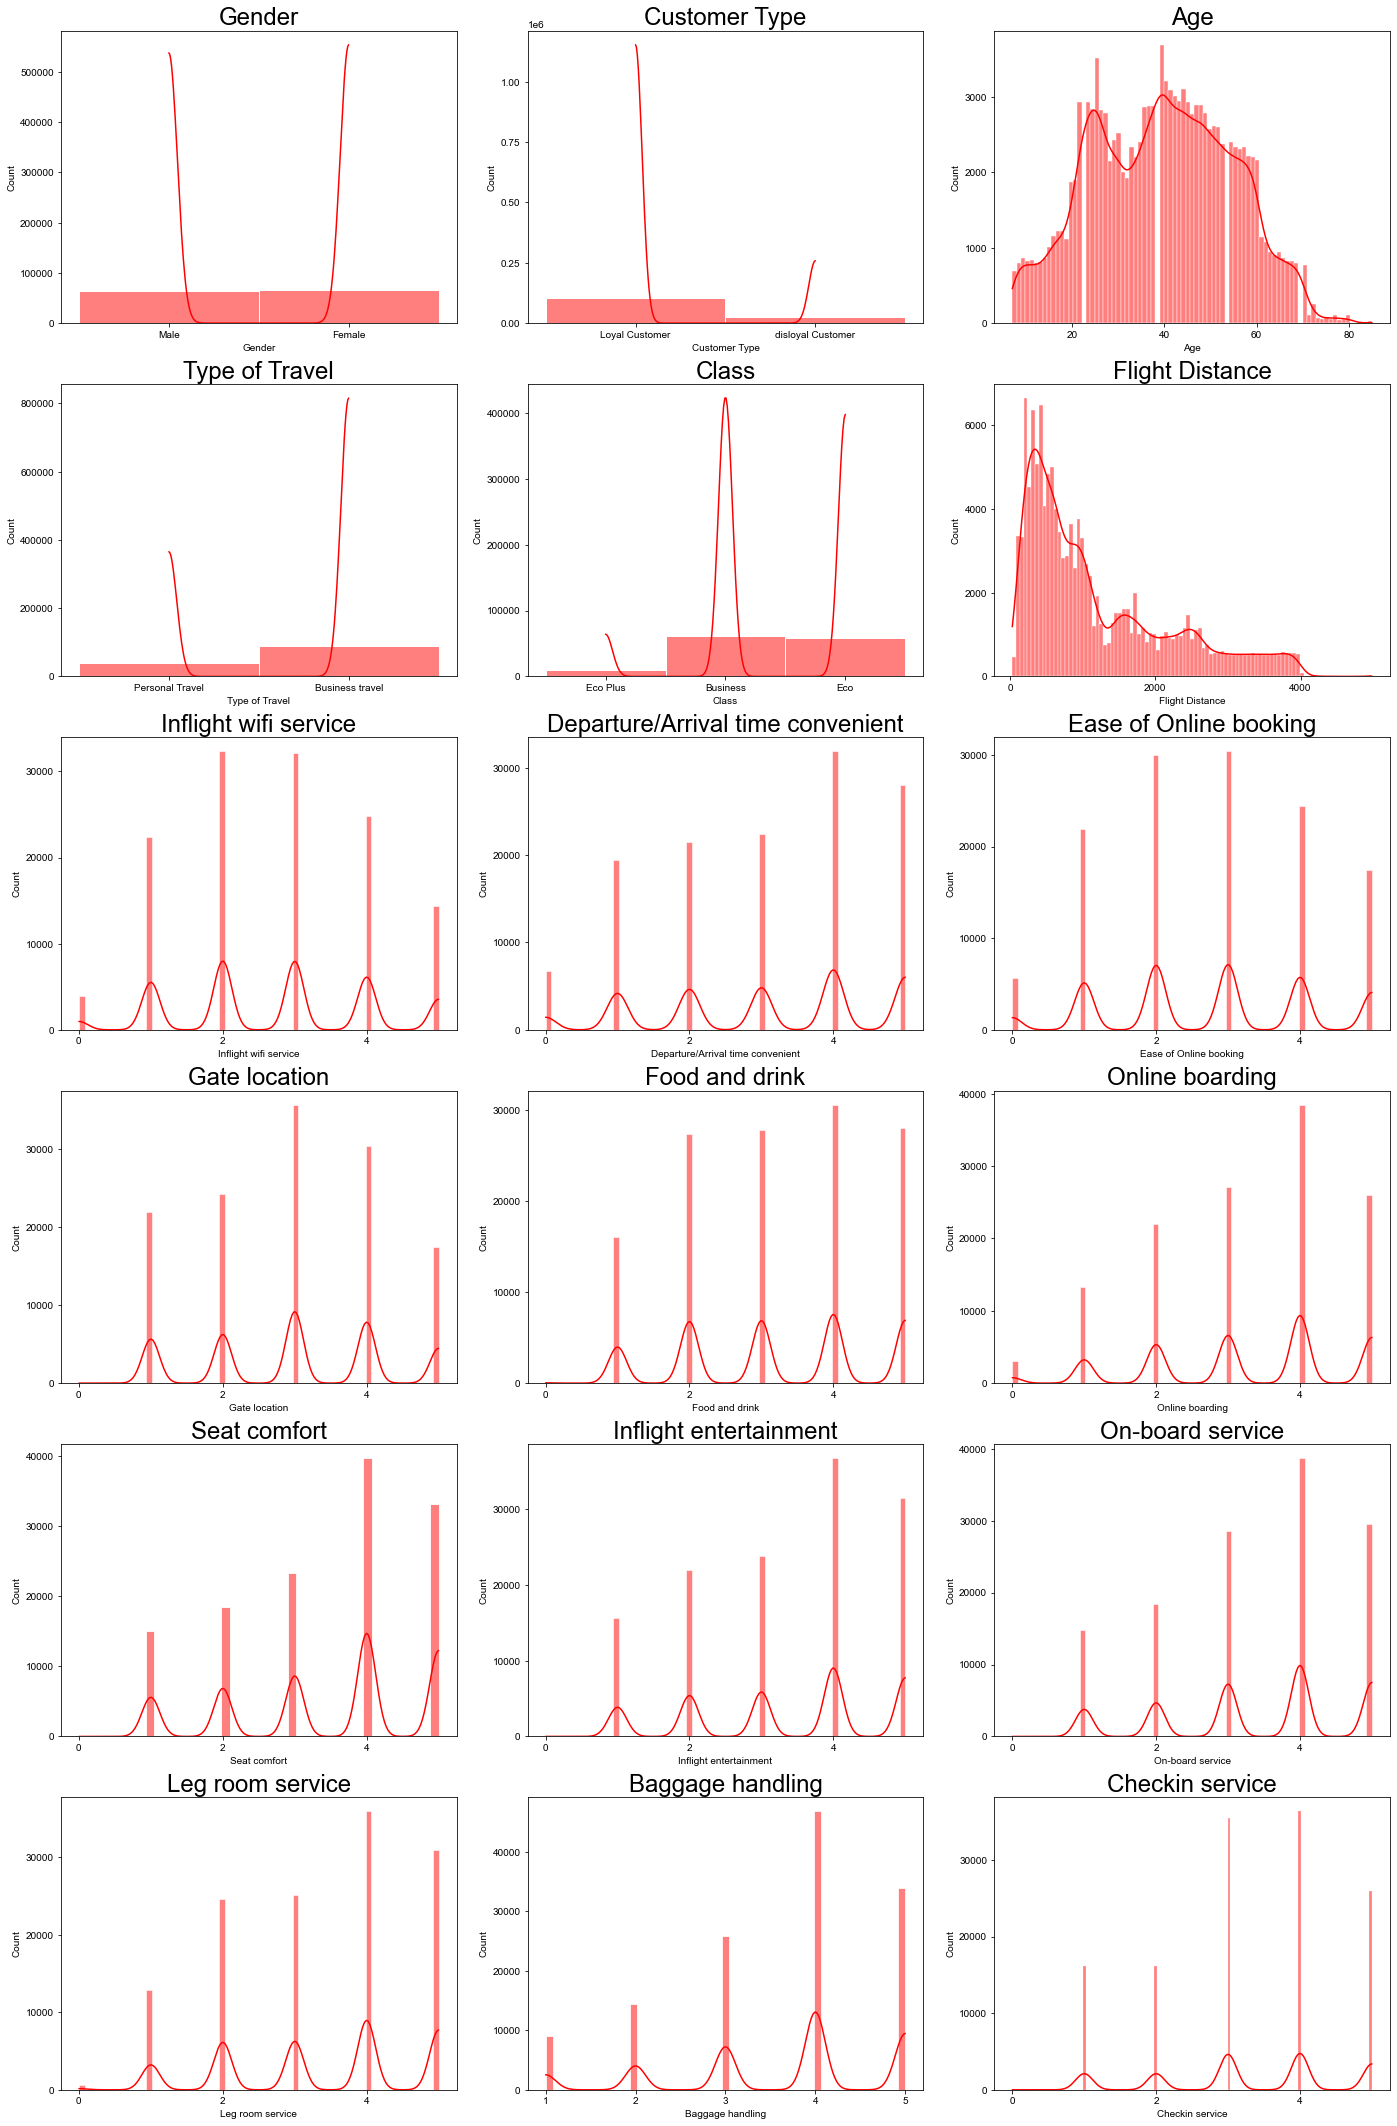

In [30]:
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)
for f,ax in zip(df1,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=df1,x=df1[f],kde=True,color='RED')
    ax.set_title(f)

Piechart percentage distribution features

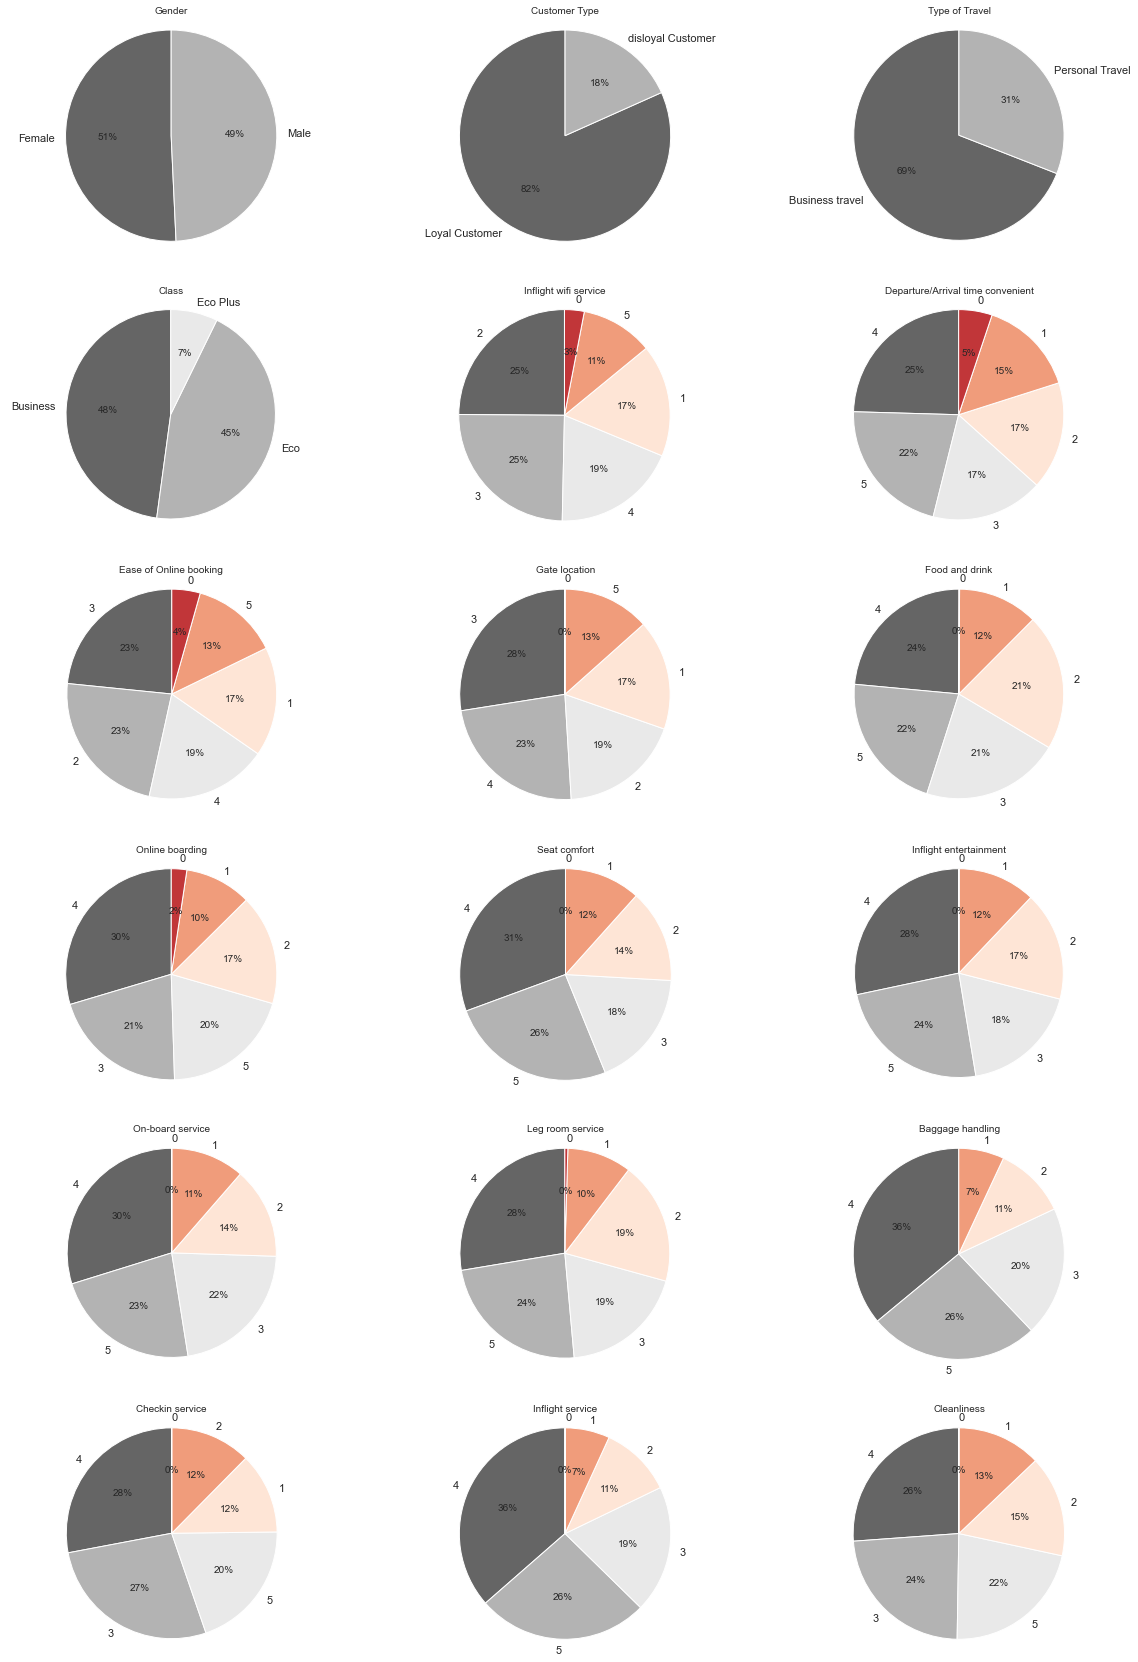

In [31]:
new_train_df=df1.copy()
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction'], axis=1, inplace=True)
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes,labels = labels, colors = sns.color_palette("RdGy_r"),autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

# Observations:

The number of men and women in this sample is approximately the same

The vast majority of the airline's customers are repeat customers

Most of our clients flew for business rather than personal reasons

About half of the passengers were in business class

More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)

More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)

# Satisfaction Distribution

In [32]:
a=df_train['satisfaction'].value_counts()

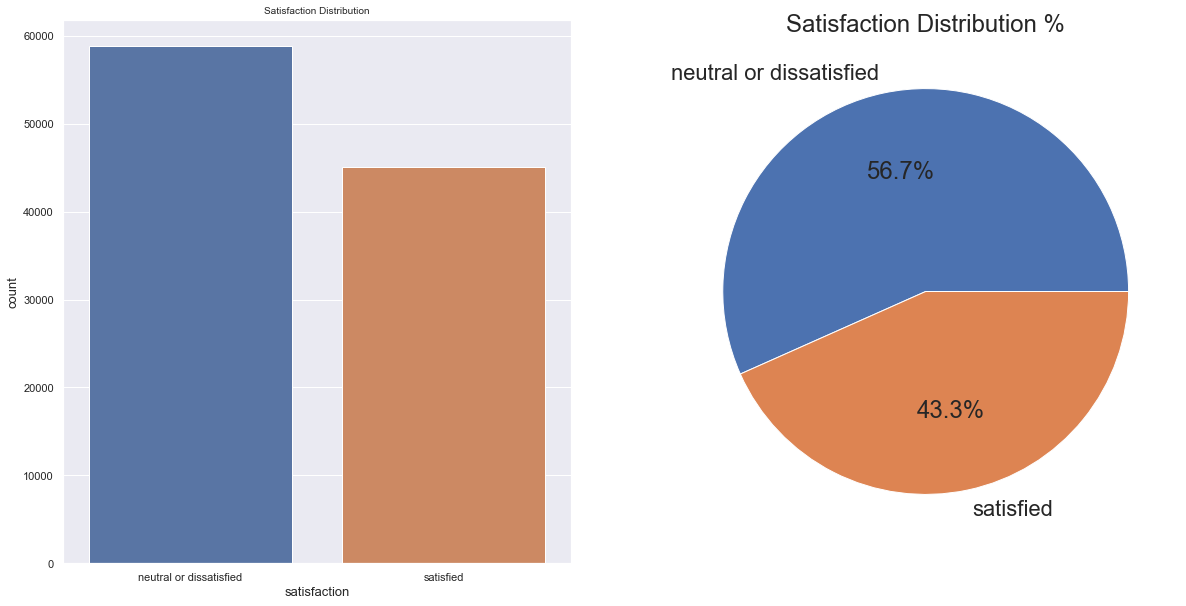

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Satisfaction Distribution")
sns.set(font_scale = 2)
sns.countplot(df_train['satisfaction'],data=df_train)

plt.subplot(1,2,2)
plt.title("Satisfaction Distribution %")
sns.set(font_scale = 2)
plt.pie(x=a.values,labels=a.index,autopct="%1.1f%%")
plt.show()

# Observations:

As per the given data 56.7% people are dissatisfied and neutral

And 43.3% people are satisfied.

In [34]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# SEPRATING NUMERIC AND CATEGORICAL COLUMNS FOR FURTHER VISUALIZATION

In [35]:
e=['int64','float']
num=df1.select_dtypes(include=e)
num

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [36]:
o=['object']
cat = df1.select_dtypes(include=o)
cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


In [37]:
# Barplot representiation on numerical columns

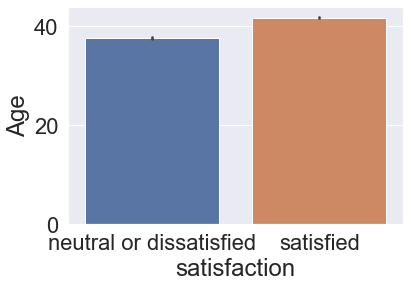

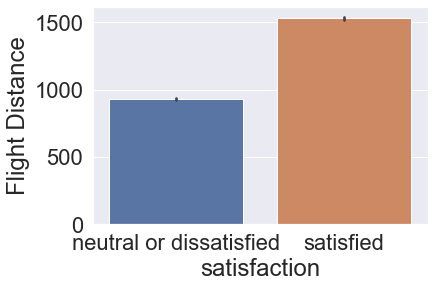

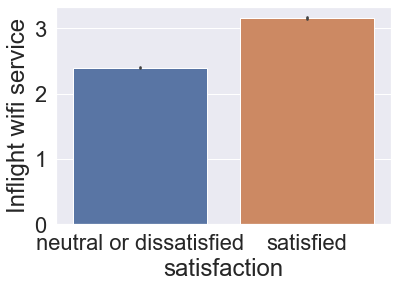

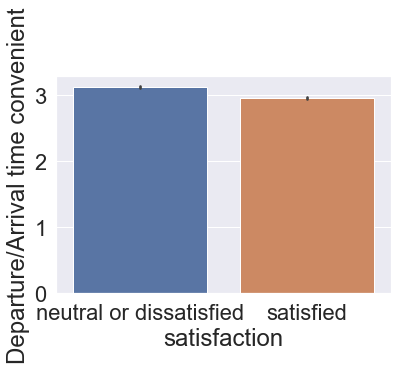

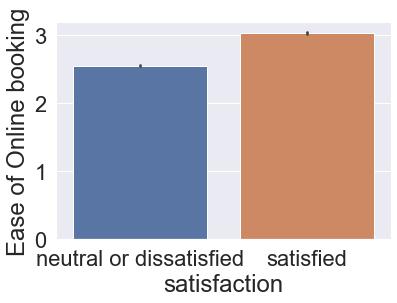

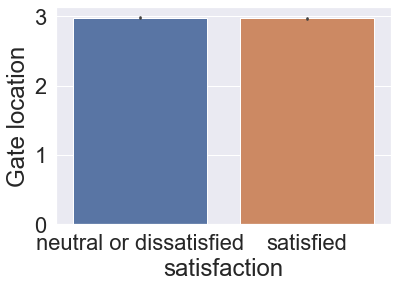

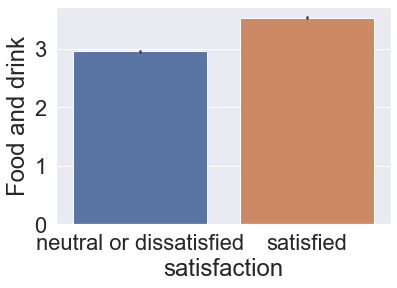

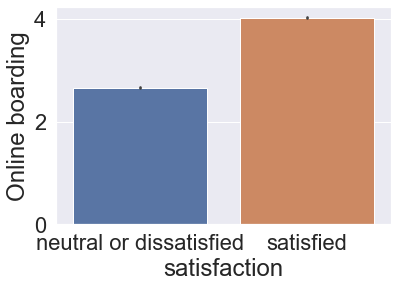

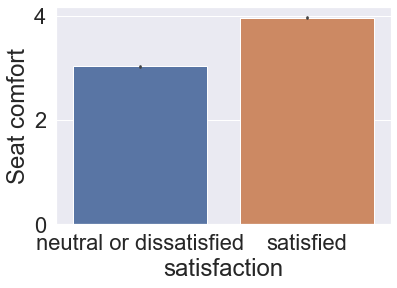

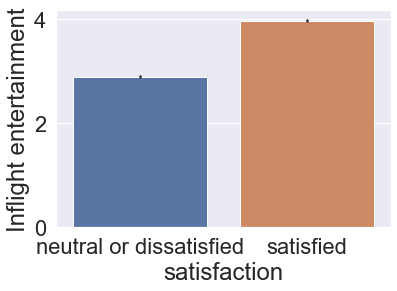

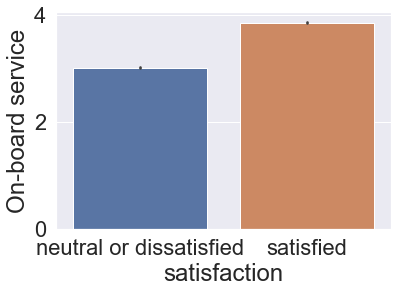

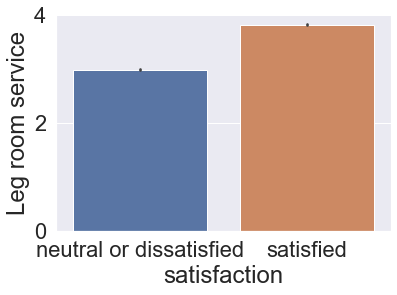

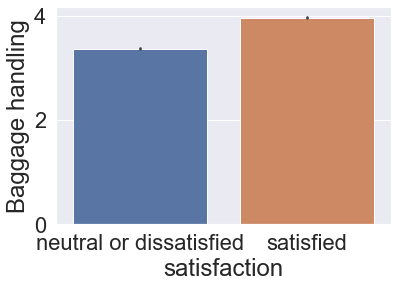

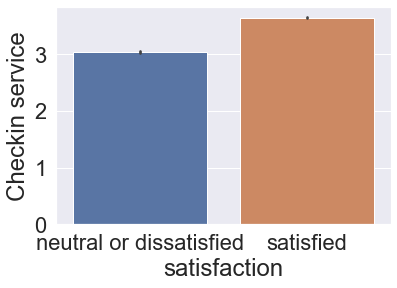

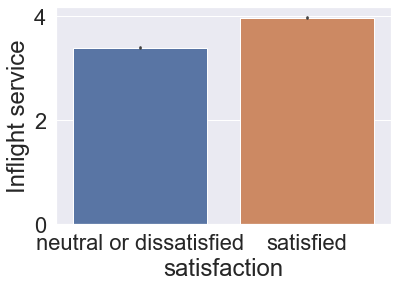

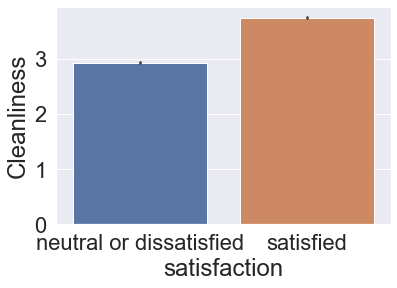

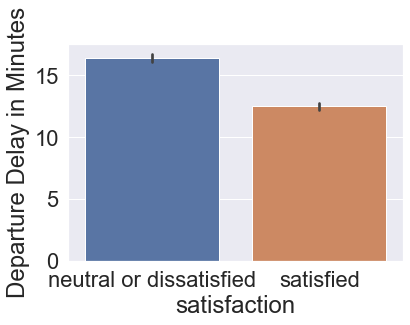

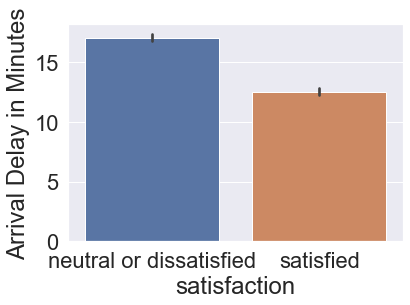

In [38]:
for i in num:
    sns.barplot(data=df1,x='satisfaction',y=i)
    plt.show()

Observations:

From above graphs,it is clear that the age and Gate location, does not play a huge role in flight satisfaction.

And also the gender does not tell us much as seen in the earlier plot. Hence we can drop these values drop these values

In [39]:
# Barplot representiation on categorical columns

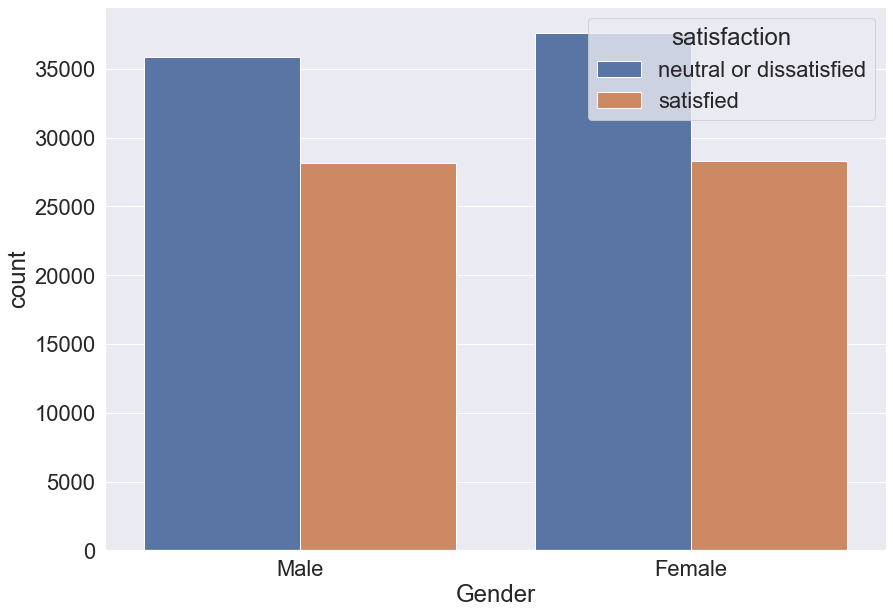

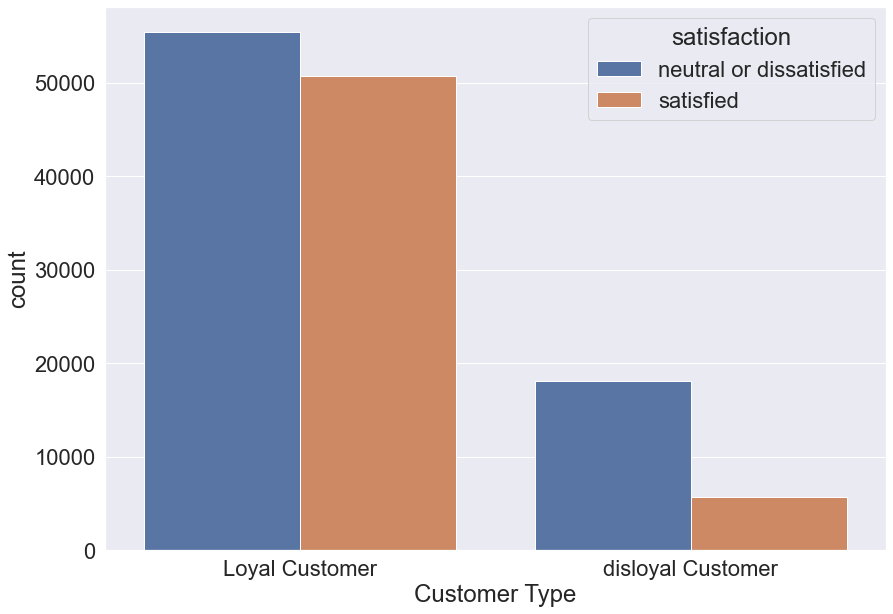

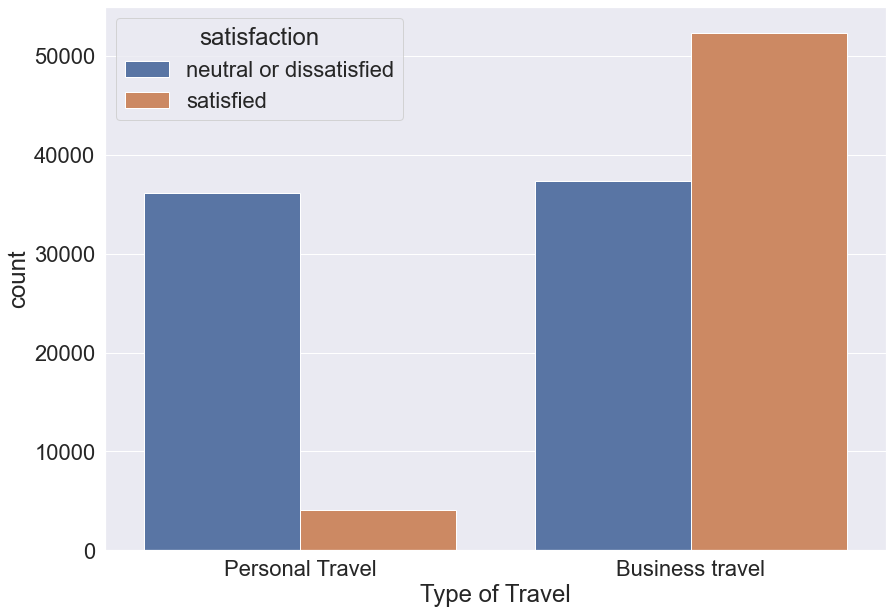

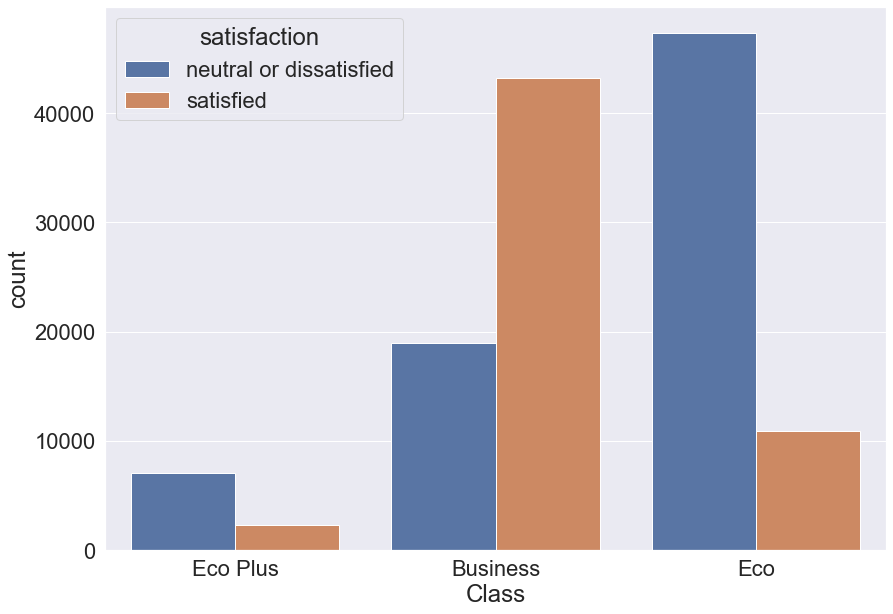

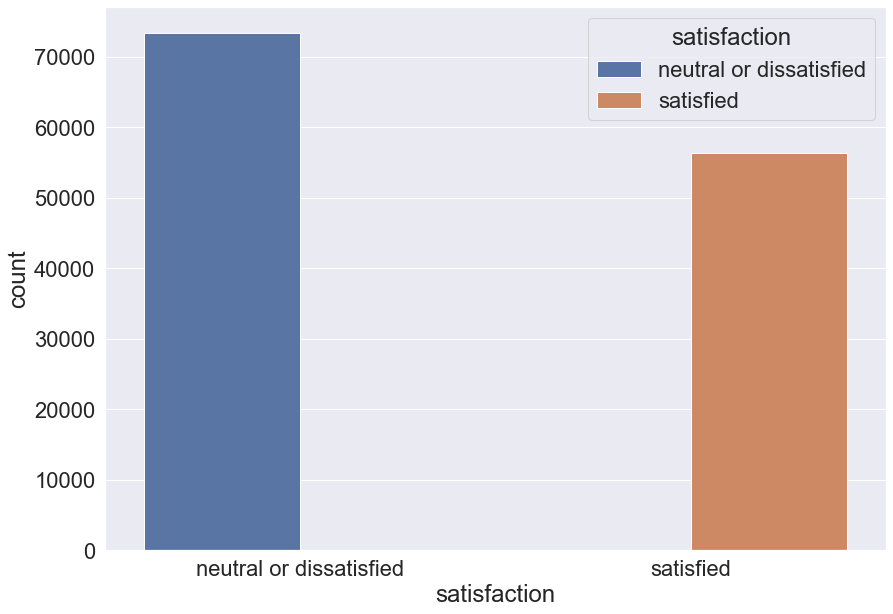

In [40]:
for cols in cat[:-1]:
    plt.figure(figsize=(14,10))
    sns.countplot(data=df1, x=cols,hue='satisfaction')
    plt.show()

Observations:

Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors

Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers

Business Travellers seems to be more satisfied with the flight, than the personal travellers

People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

# Arrival Delay in Minutes VS Departure Delay in minutes.

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

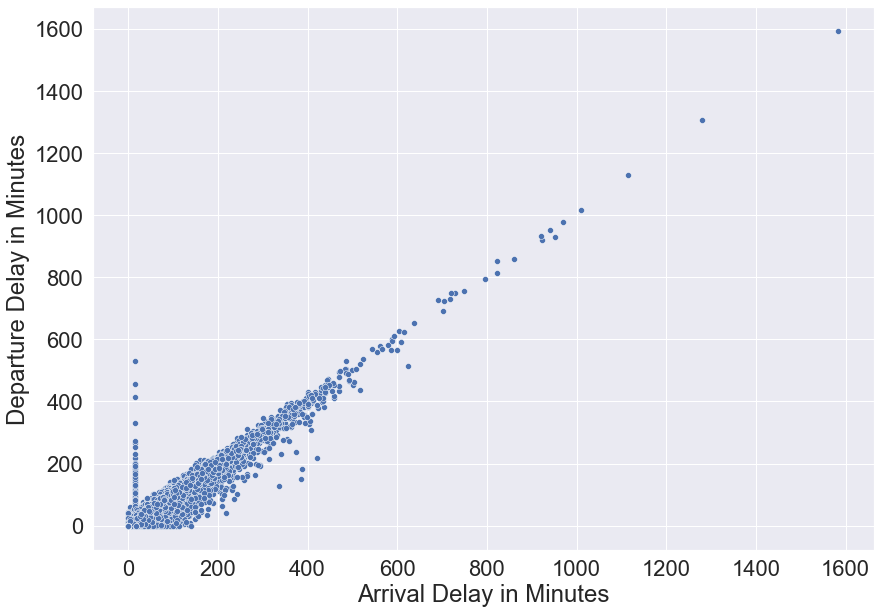

In [41]:
plt.figure(figsize=(14,10))
sns.scatterplot(df1['Arrival Delay in Minutes'], df1['Departure Delay in Minutes'],data=df1)

Observations:

The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 3 customer who was satisfied even after a delay of 1200 minutes or more!!

# Flight distance vs Departure Delay in minutes.

In [42]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<AxesSubplot:xlabel='Flight Distance', ylabel='Departure Delay in Minutes'>

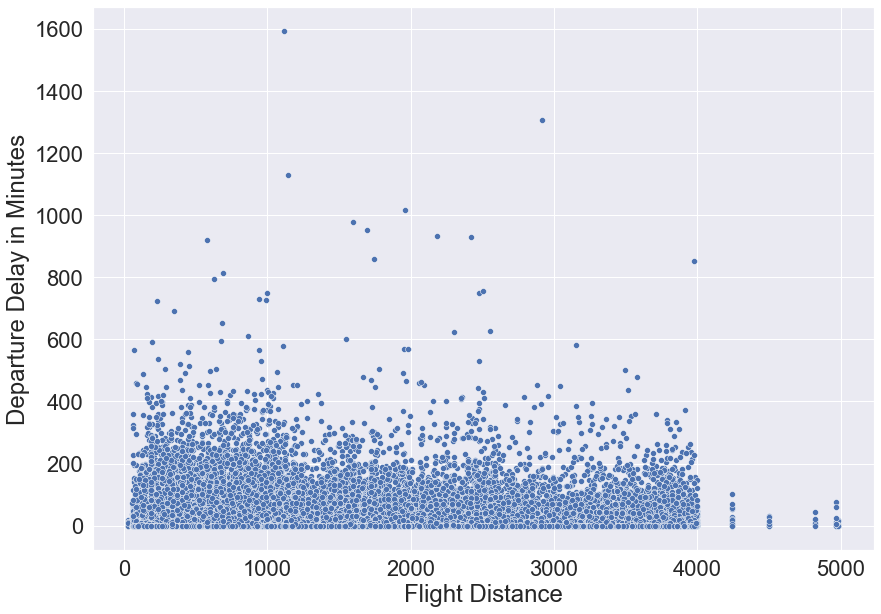

In [43]:
plt.figure(figsize=(14,10))
sns.scatterplot(df1['Flight Distance'], df1['Departure Delay in Minutes'],data=df1)

Observations:

The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot!

So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

<AxesSubplot:xlabel='Flight Distance', ylabel='Arrival Delay in Minutes'>

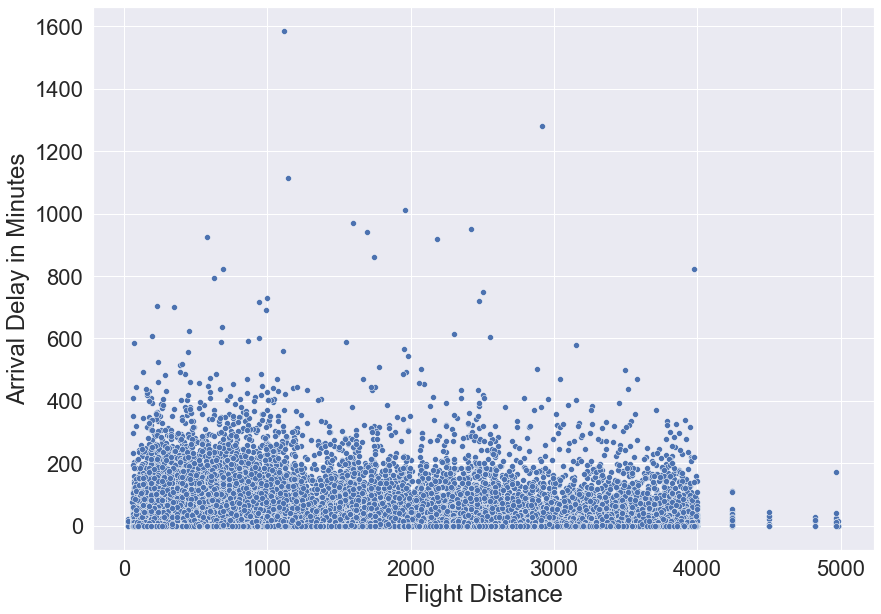

In [44]:
plt.figure(figsize=(14,10))
sns.scatterplot(df1['Flight Distance'], df1['Arrival Delay in Minutes'],data=df1)

Observations:

The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in arrival, which is a strange finding from this plot!

So arrival delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the arrival delays, which also makes sense!

# Age vs Customer type

<AxesSubplot:xlabel='Age', ylabel='Count'>

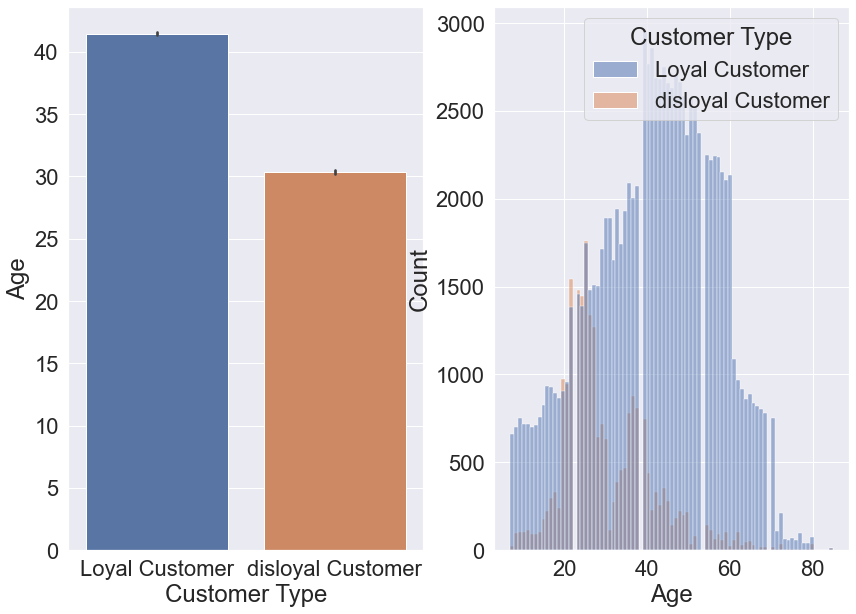

In [45]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(df1['Customer Type'], df1['Age'],data=df1)
plt.subplot(1,2,2)
sns.histplot(df1, x = "Age", hue = "Customer Type")

# Observations:

From above we can conclude that most of the airline's regular customers are between the ages of 30 and 50 (their average age is slightly over 40).
The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

# Age vs Class

<AxesSubplot:xlabel='Age', ylabel='Count'>

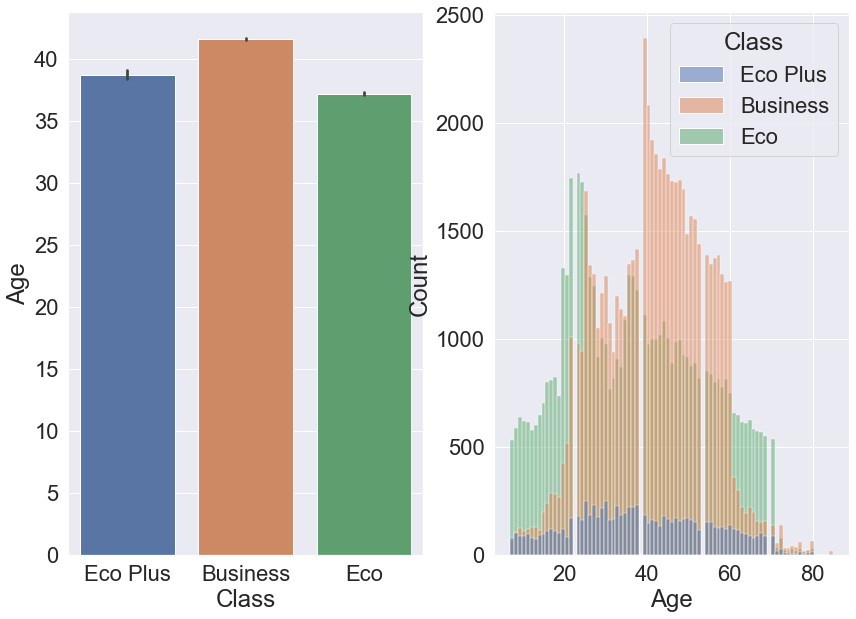

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(df1['Class'],df1['Age'],data=df1)
plt.subplot(1,2,2)
sns.histplot(df1,x='Age',hue="Class")

Observations:

It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that regular customers mainly buy business class for themselves.

# Flight distance vs class

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

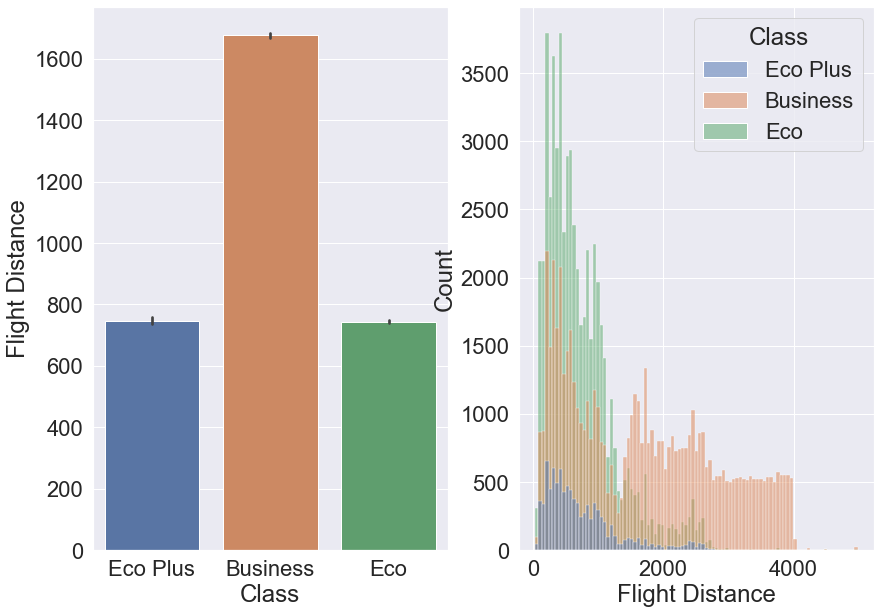

In [47]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(df1['Class'],df1['Flight Distance'],data=df1)
plt.subplot(1,2,2)
sns.histplot(df1,x='Flight Distance',hue="Class")

In [48]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [49]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [50]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


# label encoding 

In [51]:
from sklearn import preprocessing

In [52]:
label_encoder = preprocessing.LabelEncoder()

In [53]:
df1['Gender']= label_encoder.fit_transform(df1['Gender'])

In [54]:
df1['Customer Type']= label_encoder.fit_transform(df1['Customer Type'])

In [55]:
df1['Type of Travel']= label_encoder.fit_transform(df1['Type of Travel'])

In [56]:
df1['Class']= label_encoder.fit_transform(df1['Class'])

In [57]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [58]:
train=df1[~df1['satisfaction'].isnull()]

In [59]:
test=df1[df1['satisfaction'].isnull()]

In [60]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [61]:
train['satisfaction']= label_encoder.fit_transform(train['satisfaction'])

In [62]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [63]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction


In [64]:
test.drop(columns=['satisfaction'],inplace=True)

In [65]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


# Segregate the features to train model

In [66]:
x = train.drop(columns=['satisfaction'])
y = train['satisfaction']

# train_test_split 

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print("The shape of x_train :",x_train.shape)
print("The shape of x_test :",x_test.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of y_test :",y_test.shape)

The shape of x_train : (103904, 22)
The shape of x_test : (25976, 22)
The shape of y_train : (103904,)
The shape of y_test : (25976,)


# Model Building

In [69]:
train_score2=[]
test_score2=[]

In [70]:
def model(model):
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    
    a=accuracy_score(y_pred,y_test)
    b=accuracy_score(y_pred_train,y_train)
    
    test_score2.append(a)
    train_score2.append(b)
    
    cm = confusion_matrix(y_pred,y_test)

    plt.figure(figsize=(15,6))
    sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
    plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.show()
    
    print("F1 Score of the Model is =>",f1_score(y_pred,y_test,average="micro"))
    print("Recall Score of the Model is =>",recall_score(y_pred,y_test,average="micro"))
    print("Precision Score of the Model is =>",precision_score(y_pred,y_test,average="micro"))
    print("----")
    print("----")  
    print("The accuracy_score of test data is:",a)
    print("The accuracy_score of train data is:",b)

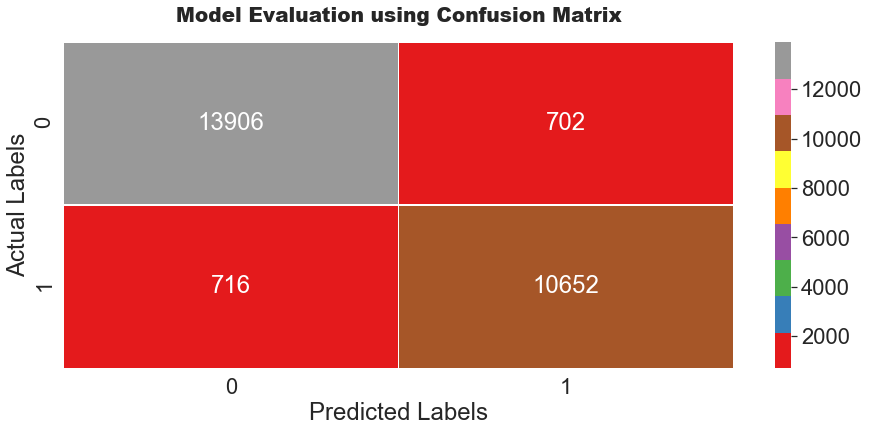

F1 Score of the Model is => 0.9454111487526948
Recall Score of the Model is => 0.9454111487526948
Precision Score of the Model is => 0.9454111487526948
----
----
The accuracy_score of test data is: 0.9454111487526948
The accuracy_score of train data is: 1.0


In [71]:
model(DecisionTreeClassifier())

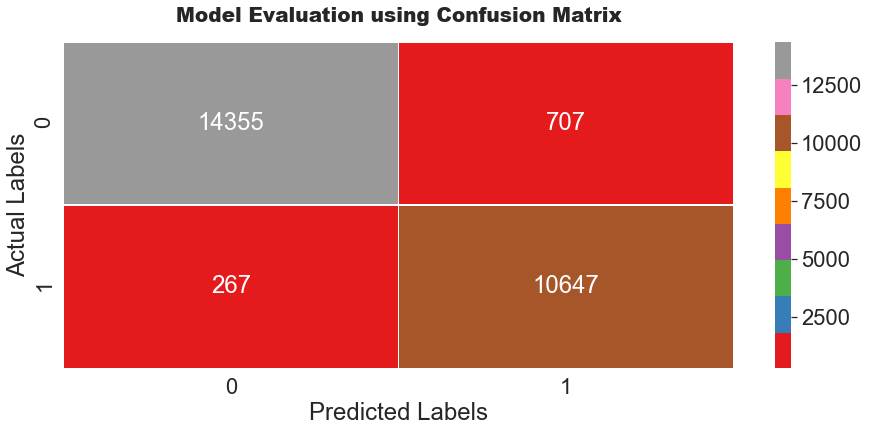

F1 Score of the Model is => 0.9625038497074222
Recall Score of the Model is => 0.9625038497074222
Precision Score of the Model is => 0.9625038497074222
----
----
The accuracy_score of test data is: 0.9625038497074222
The accuracy_score of train data is: 1.0


In [72]:
model(RandomForestClassifier())

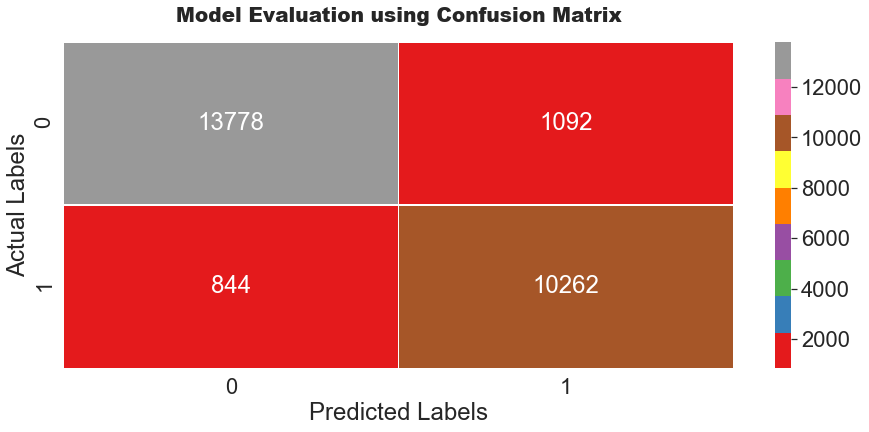

F1 Score of the Model is => 0.9254696643055128
Recall Score of the Model is => 0.9254696643055128
Precision Score of the Model is => 0.9254696643055128
----
----
The accuracy_score of test data is: 0.9254696643055128
The accuracy_score of train data is: 0.9271346627656298


In [73]:
model(AdaBoostClassifier())

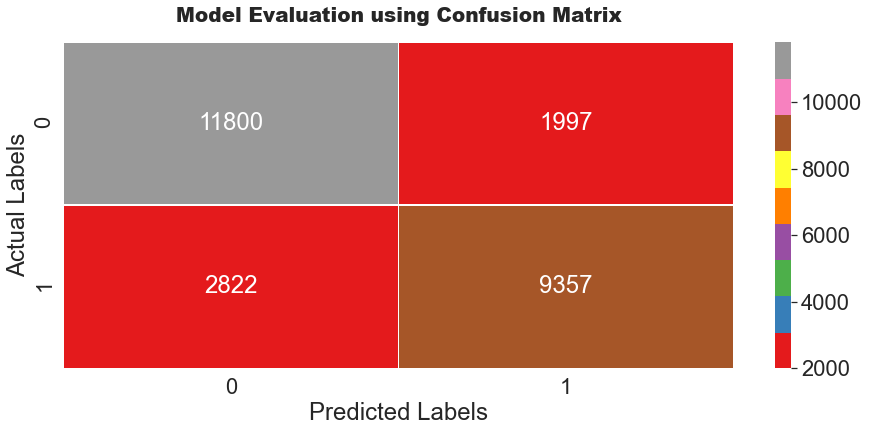

F1 Score of the Model is => 0.8144825993224514
Recall Score of the Model is => 0.8144825993224515
Precision Score of the Model is => 0.8144825993224515
----
----
The accuracy_score of test data is: 0.8144825993224515
The accuracy_score of train data is: 0.8168212965814599


In [74]:
model(LogisticRegression())

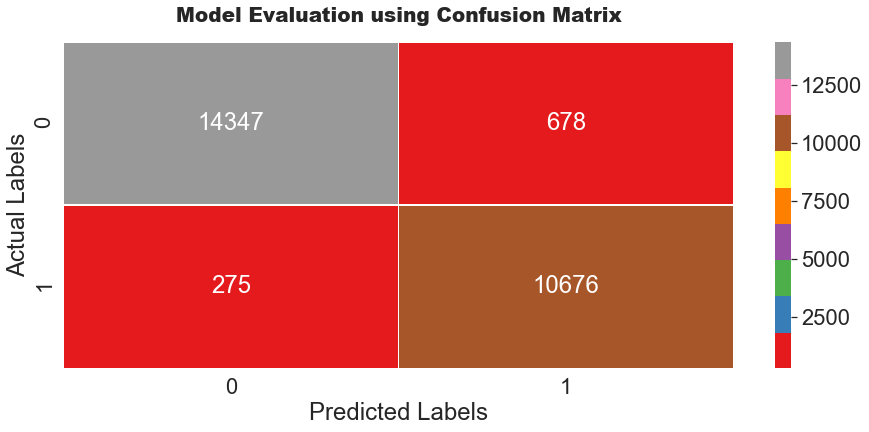

F1 Score of the Model is => 0.9633122882660918
Recall Score of the Model is => 0.9633122882660918
Precision Score of the Model is => 0.9633122882660918
----
----
The accuracy_score of test data is: 0.9633122882660918
The accuracy_score of train data is: 0.9748325377271327


In [75]:
model(XGBClassifier())

In [77]:
from sklearn.naive_bayes import GaussianNB

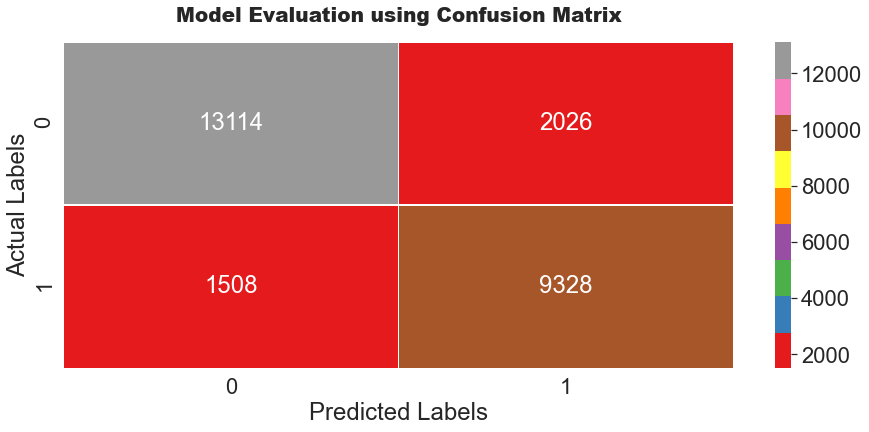

F1 Score of the Model is => 0.8639513396981829
Recall Score of the Model is => 0.8639513396981829
Precision Score of the Model is => 0.8639513396981829
----
----
The accuracy_score of test data is: 0.8639513396981829
The accuracy_score of train data is: 0.8634316291961811


In [78]:
model(GaussianNB())

# Model Performance Comparision

In [79]:
train_score2

[1.0,
 1.0,
 0.9271346627656298,
 0.8168212965814599,
 0.9748325377271327,
 0.8634316291961811]

In [80]:
test_score2

[0.9454111487526948,
 0.9625038497074222,
 0.9254696643055128,
 0.8144825993224515,
 0.9633122882660918,
 0.8639513396981829]

In [90]:
Algorithms=['Decision Tree','Random Forest','AdaBoost','Logistic Regression','XGBoost','GaussianNB']

In [91]:
df=pd.DataFrame({'Algorithm':Alogorithms,
                 'Train_score':train_score2,
                 'Test_score':test_score2})

In [93]:
df

,Algorithm,Train_score,Test_score
0,Decision Tree,1.000000,0.945411
1,Random Forest,1.000000,0.962504
2,AdaBoost,0.927135,0.925470
3,Logistic Regression,0.816821,0.814483
4,XGBoost,0.974833,0.963312
5,GaussianNB,0.863432,0.863951


<AxesSubplot:title={'center':'Algorithms Accuracy Evaluation'}, xlabel='Algorithm'>

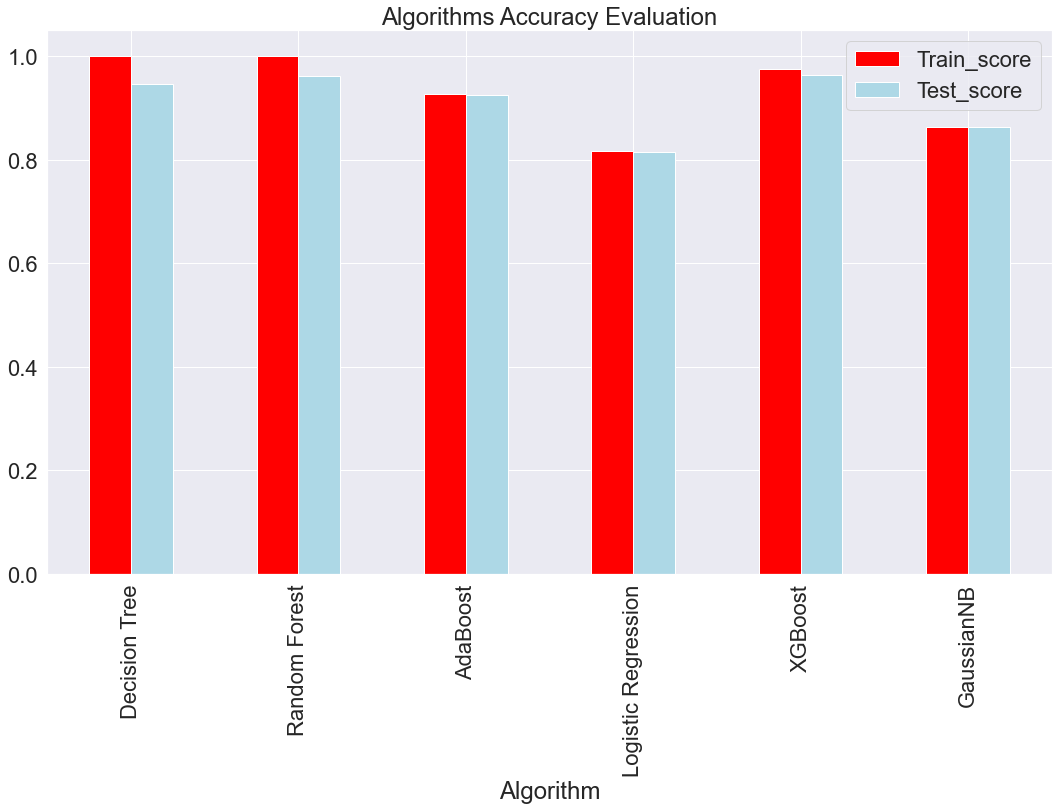

In [94]:
df.plot(x='Algorithm',y=['Train_score','Test_score'], kind='bar',color=['red','lightblue'],title='Algorithms Accuracy Evaluation',figsize=(18,10))

# As you can see RandomForestClassifier is having highest r2_score, Precision,recall,f1_score and having highest accuracy on test data

# Hyperparameter Tunning for Random Forest Model

In [95]:
rd=RandomForestClassifier()

In [101]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
y_pred=rd.predict(x_test)

In [103]:
y_pred_train= rd.predict(x_train)

In [104]:
accuracy_score(y_pred,y_test)

0.9622343701878657

In [105]:
accuracy_score(y_pred_train,y_train)

0.9999903757314444

In [96]:
param_grid = {"max_depth":[2,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [20,30,50,50],
              "criterion":["gini","entropy"]}

In [97]:
grid_search = GridSearchCV(rd, param_grid, cv=5, n_jobs=-1)

In [99]:
grid_search.fit(x_train,y_train)

In [110]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)

In [111]:
best_parameters=grid_search.best_params_

In [112]:
rd= RandomForestClassifier(**best_parameters)
rd.fit(x_train,y_train)

In [113]:
y_pred= rd.predict(x_test)

In [114]:
y_pred_train=rd.predict(x_train)

In [115]:
accuracy_score(y_pred,y_test)

# Calculating and Visualizing the feature importances

In [106]:
Feature_Importance = pd.DataFrame({"Feature Name":x_train.columns,"Importance":rd.feature_importances_})

In [107]:
Feature= Feature_Importance.sort_values(by='Importance',ascending=False)

In [108]:
Feature

,Feature Name,Importance
11,Online boarding,0.163879
6,Inflight wifi service,0.140662
3,Type of Travel,0.112718
4,Class,0.081049
12,Seat comfort,0.059207
13,Inflight entertainment,0.056937
1,Customer Type,0.041766
5,Flight Distance,0.038876
8,Ease of Online booking,0.038822
15,Leg room service,0.035861


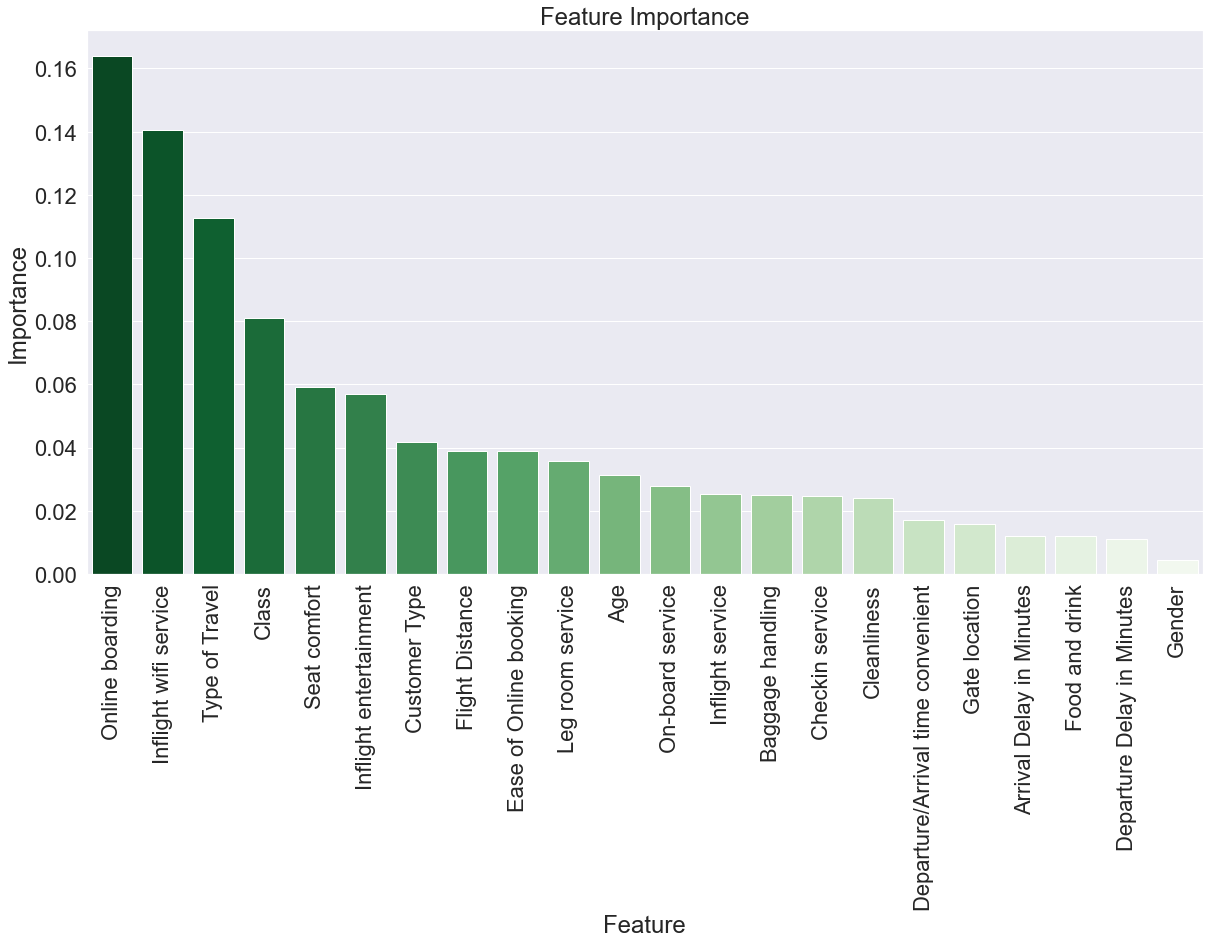

In [109]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Feature Name',y='Importance',data=Feature,palette='Greens_r')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90);

# Conclusion

The goal of the project is to build a model to find out The Airline passenger satisfaction level: neutral or dissatisfaction’, ‘satisfaction’

I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of XG Boost and Light Boost Models to achieve higher recall and F1-Score.

The model is performing very good with the test data too.

This project has been a great exercise for me to understand the concepts of machine learning. There are so many limitations with this model as the model is built only on the features that are provided in the dataset. There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved.